In [1]:
#Make a folder containing this notebook and the csv file we are working on (in this case the 911.csv file). To check that they are in the same folder we use below mentioned fns from os

In [2]:
#check for data file
import os

In [3]:
print(os.listdir())
#This fn shows all the files present in the same directory as that of this notebook, hence we can check if both the csv and this python notebook are in the same folder 

['.ipynb_checkpoints', '911 Project - Hello world of ML.ipynb', '911.csv']


In [4]:
# import all major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# usage of inline plotting
%matplotlib inline

In [6]:
#load data from CSV file
dataFrame = pd.read_csv('./911.csv')

In [7]:
dataFrame.info()
#Checks the different colmns and their data types similar to summary fn in R 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [8]:
#check head for our dataframe
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [9]:
#top5 zipcodes
dataFrame['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [10]:
#top6 twp reaching to 911
dataFrame['twp'].value_counts().head(6)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
POTTSTOWN       12039
Name: twp, dtype: int64

In [11]:
#unique reason to call 911
#Counts no of unqiue values in a series/colmn
dataFrame['title'].nunique()

131

In [12]:
# top5 specific reasons to call 911
# Title contains EMS: reason, but if we wanted the EMS part seprately hence we use the apply fn
#apply() is used to apply a fn across the rows 
#In Python, an anonymous function is a function that is defined without a name.
#While normal functions are defined using the def keyword in Python, anonymous functions are defined using the lambda keyword.
#lambda arguments: expression
#Here lambda splits title and returns the first part which is then stored in a new coln created by us
dataFrame['SpecificReason'] = dataFrame['title'].apply(lambda title: title.split(':')[0])

In [13]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [14]:
dataFrame['SpecificReason'].value_counts().head()

EMS        144362
Traffic    101889
Fire        42989
Name: SpecificReason, dtype: int64

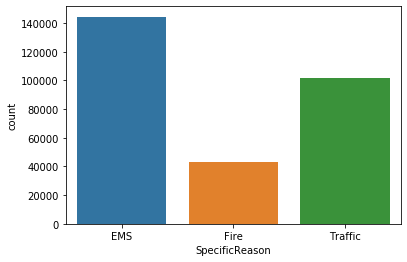

In [15]:
#plot a countplot for SpecificReason
sns.countplot(x='SpecificReason', data=dataFrame)

In [16]:
#convert timeStamp from object to actual time stamp
dataFrame['timeStamp'] = pd.to_datetime(dataFrame['timeStamp'])

In [17]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   lat             289240 non-null  float64       
 1   lng             289240 non-null  float64       
 2   desc            289240 non-null  object        
 3   zip             253942 non-null  float64       
 4   title           289240 non-null  object        
 5   timeStamp       289240 non-null  datetime64[ns]
 6   twp             289137 non-null  object        
 7   addr            289240 non-null  object        
 8   e               289240 non-null  int64         
 9   SpecificReason  289240 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 22.1+ MB


In [18]:
type(dataFrame['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
#create 3 columns for Hour, Months and day of week
dataFrame['Hour'] = dataFrame['timeStamp'].apply(lambda time: time.hour)
dataFrame['Month'] = dataFrame['timeStamp'].apply(lambda time: time.month)
dataFrame['Day'] = dataFrame['timeStamp'].apply(lambda time: time.dayofweek)


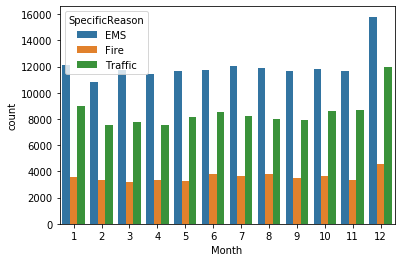

In [20]:
#plot a graph for Month
sns.countplot(x='Month', data=dataFrame, hue='SpecificReason')

In [21]:
#use group_by 
#Group by - groups data on basis of a particular value in a colmn
byMonth = dataFrame.groupby('Day').count()

In [22]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,Hour,Month
Day,,,,,,,,,,,,
0,42092,42092,42092,37030,42092,42092,42081,42092,42092,42092,42092,42092
1,43744,43744,43744,38385,43744,43744,43731,43744,43744,43744,43744,43744
2,43442,43442,43442,38327,43442,43442,43422,43442,43442,43442,43442,43442
3,42784,42784,42784,37616,42784,42784,42770,42784,42784,42784,42784,42784
4,44468,44468,44468,38923,44468,44468,44450,44468,44468,44468,44468,44468


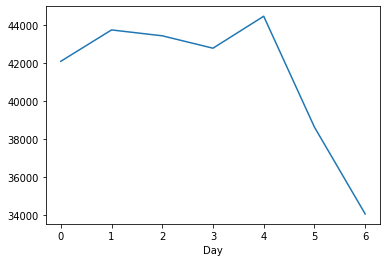

In [23]:
byMonth['twp'].plot()